In [113]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np


# 경고메시지 무시
import warnings
warnings.filterwarnings("ignore")

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn 스타일을 이용하겠다.MS
plt.rc('font', family='NanumBarunGothic') 
plt.style.use('seaborn-deep')
sns.set(font_scale=1.3)

In [114]:
data = pd.read_csv('data/DATA_SSC_ONEPER_F.csv', encoding='cp949')

In [115]:
data['소비년월']= data['소비년월'].astype('str')

# 소비년월 -> 년, 월 나눈 새로운 컬럼 생성
data["month"]=data["소비년월"].str[4:6]
data["year"]=data["소비년월"].str[:4]


In [116]:
data["고객거주시"]=data["고객거주지역"].str[:2]

data.head()

,소비년월,고객거주지역,연령성별,직업,추정소득,일인가구여부,고객수,CNT,CNT_DAY_월,CNT_DAY_화,...,CNT_취미,CNT_커피음료,CNT_패션잡화,CNT_편의점,CNT_학교,CNT_학원,CNT_화장품,month,year,고객거주시
0,201912,경기 파주시,B,D.공무원,D,X,127,1128,200,185,...,0,23,0,101,0,10,0,12,2019,경기
1,201912,대전 서구,D,E.교육인,A,X,101,1128,193,188,...,15,58,0,72,0,0,10,12,2019,대전
2,201912,경기 의왕시,B,D.공무원,C,X,94,1129,200,210,...,11,44,0,96,0,0,0,12,2019,경기
3,201912,경남 거창군,E,F.자영업자,B,X,165,1129,180,174,...,10,32,14,52,0,0,11,12,2019,경남
4,201912,광주 북구,A,D.공무원,B,X,90,1131,180,196,...,17,57,0,163,0,0,0,12,2019,광주


In [121]:
detail_data = data.copy()

In [122]:
data[['CNT_가례',
       'CNT_가전', 'CNT_건강보조', 'CNT_골프장', 'CNT_공과금', 'CNT_관람', 'CNT_교육기타',
       'CNT_교통', 'CNT_놀이공원', 'CNT_대중교통', 'CNT_동물병원', 'CNT_마트할인점', 'CNT_면세점',
       'CNT_문구사무용품', 'CNT_배달앱', 'CNT_백화점', 'CNT_병원', 'CNT_보험', 'CNT_뷰티',
       'CNT_상품권', 'CNT_서적', 'CNT_쇼핑기타', 'CNT_숙박', 'CNT_스포츠시설', 'CNT_스포츠의류용품',
       'CNT_아울렛', 'CNT_여행상품', 'CNT_온라인쇼핑', 'CNT_유아교육', 'CNT_유흥', 'CNT_음식점',
       'CNT_의류', 'CNT_인테리어', 'CNT_정기결제', 'CNT_제과점', 'CNT_주류판매점', 'CNT_주생활관리',
       'CNT_주유', 'CNT_주차', 'CNT_차량관리', 'CNT_차량구매', 'CNT_취미', 'CNT_커피음료',
       'CNT_패션잡화', 'CNT_편의점', 'CNT_학교', 'CNT_학원', 'CNT_화장품']].sum().sort_values(ascending = False)

KeyError: "None of [Index(['CNT_가례', 'CNT_가전', 'CNT_건강보조', 'CNT_골프장', 'CNT_공과금', 'CNT_관람',\n       'CNT_교육기타', 'CNT_교통', 'CNT_놀이공원', 'CNT_대중교통', 'CNT_동물병원', 'CNT_마트할인점',\n       'CNT_면세점', 'CNT_문구사무용품', 'CNT_배달앱', 'CNT_백화점', 'CNT_병원', 'CNT_보험',\n       'CNT_뷰티', 'CNT_상품권', 'CNT_서적', 'CNT_쇼핑기타', 'CNT_숙박', 'CNT_스포츠시설',\n       'CNT_스포츠의류용품', 'CNT_아울렛', 'CNT_여행상품', 'CNT_온라인쇼핑', 'CNT_유아교육', 'CNT_유흥',\n       'CNT_음식점', 'CNT_의류', 'CNT_인테리어', 'CNT_정기결제', 'CNT_제과점', 'CNT_주류판매점',\n       'CNT_주생활관리', 'CNT_주유', 'CNT_주차', 'CNT_차량관리', 'CNT_차량구매', 'CNT_취미',\n       'CNT_커피음료', 'CNT_패션잡화', 'CNT_편의점', 'CNT_학교', 'CNT_학원', 'CNT_화장품'],\n      dtype='object')] are in the [columns]"

In [ ]:
# 총 9개의 범주로 묶음(애매한 건 기타로 넣었는데, 피드백 주세요.)
# 여가생활
data['여가생활'] = data['CNT_골프장'] + data['CNT_관람'] + data['CNT_놀이공원'] + data['CNT_스포츠시설'] + data['CNT_여행상품'] + data['CNT_유흥'] + data['CNT_취미']

# 소비(외부)
data['소비(외부)'] = data['CNT_마트할인점'] + data['CNT_편의점']

# 소비(내부)
data['소비(내부)'] = data['CNT_온라인쇼핑'] + data['CNT_배달앱']

# 패션 및 뷰티
data['패션 및 뷰티'] = data['CNT_면세점'] + data['CNT_백화점'] + data['CNT_쇼핑기타'] + data['CNT_스포츠의류용품'] + data['CNT_아울렛'] + data['CNT_패션잡화'] + data['CNT_화장품'] + data['CNT_뷰티'] + data['CNT_의류']

# 건강
data['건강']= data['CNT_건강보조'] + data['CNT_병원'] + data['CNT_보험']

# 식품
data['식품'] = data['CNT_커피음료'] + data['CNT_음식점'] + data['CNT_제과점'] + data['CNT_주류판매점']

# 교육
data['교육'] = data['CNT_교육기타'] + data['CNT_학교'] + data['CNT_학원'] + data['CNT_유아교육']

# 교통
data['교통'] = data['CNT_주유'] + data['CNT_주차'] + data['CNT_차량관리'] + data['CNT_차량구매'] + data['CNT_교통'] +  data['CNT_대중교통']

# 기타
data['기타'] = data['CNT_가례'] + data['CNT_공과금'] + data['CNT_인테리어'] + data['CNT_정기결제'] + data['CNT_상품권'] + data['CNT_서적'] + data['CNT_가전'] + data['CNT_주생활관리'] + data['CNT_숙박'] + data['CNT_문구사무용품'] + data['CNT_동물병원']

In [ ]:
# 기존 업종 열 삭제
data = data.drop(['CNT_가례', 'CNT_가전', 'CNT_건강보조', 'CNT_골프장', 'CNT_공과금', 'CNT_관람', 'CNT_교육기타',
       'CNT_교통', 'CNT_놀이공원', 'CNT_대중교통', 'CNT_동물병원', 'CNT_마트할인점', 'CNT_면세점',
       'CNT_문구사무용품', 'CNT_배달앱', 'CNT_백화점', 'CNT_병원', 'CNT_보험', 'CNT_뷰티',
       'CNT_상품권', 'CNT_서적', 'CNT_쇼핑기타', 'CNT_숙박', 'CNT_스포츠시설', 'CNT_스포츠의류용품',
       'CNT_아울렛', 'CNT_여행상품', 'CNT_온라인쇼핑', 'CNT_유아교육', 'CNT_유흥', 'CNT_음식점',
       'CNT_의류', 'CNT_인테리어', 'CNT_정기결제', 'CNT_제과점', 'CNT_주류판매점', 'CNT_주생활관리',
       'CNT_주유', 'CNT_주차', 'CNT_차량관리', 'CNT_차량구매', 'CNT_취미', 'CNT_커피음료',
       'CNT_패션잡화', 'CNT_편의점', 'CNT_학교', 'CNT_학원', 'CNT_화장품'], axis=1)

In [ ]:
# 확인
data.columns

Index(['연령성별', '직업', '추정소득', '일인가구여부', '고객수', 'CNT', 'CNT_DAY_월', 'CNT_DAY_화',
       'CNT_DAY_수', 'CNT_DAY_목', 'CNT_DAY_금', 'CNT_DAY_토', 'CNT_DAY_일',
       'CNT_DAY_평일', 'CNT_DAY_주말공휴일', 'CNT_TIME_A', 'CNT_TIME_B', 'CNT_TIME_C',
       'CNT_TIME_D', 'CNT_TIME_E', 'CNT_TIME_F', 'CNT_TIME_G', 'CNT_TIME_H',
       'CNT_TIME_I', 'CNT_TIME_J', 'month', 'year', '고객거주시', '여가생활', '소비(외부)',
       '소비(내부)', '패션 및 뷰티', '건강', '식품', '교육', '교통', '기타'],
      dtype='object')

In [ ]:
# 코로나 전후 수입 비교

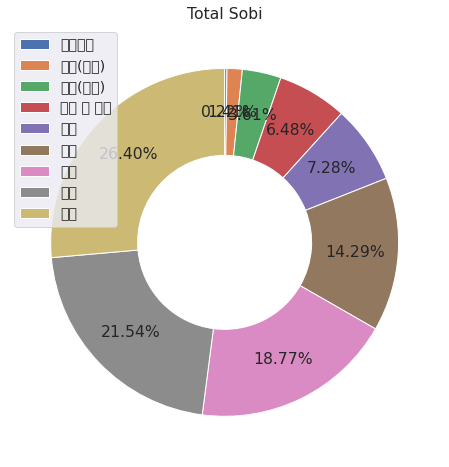

In [123]:
data['업종_거래수_총합'] = data['여가생활'] + data['소비(외부)'] + data['소비(내부)']+ data['패션 및 뷰티']+ data['건강']+ data['식품'] + data['교육'] + data['교통'] + data['기타']
up_jong_total = data[["업종_거래수_총합"]]
up_jong = data[["여가생활", "소비(외부)", "소비(내부)", "패션 및 뷰티", "건강", "식품", "교육", "교통", "기타"]]
up_jong_label = ["여가생활", "소비(외부)", "소비(내부)", "패션 및 뷰티", "건강", "식품", "교육", "교통", "기타"]
up_jong_ratio = sorted(list(up_jong.sum()))

 
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot() 

pie = ax.pie(up_jong_ratio, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       wedgeprops=dict(width=0.5) ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
       )

total = np.sum(up_jong_ratio)

sum_pct = 0 ## 백분율 초기값
for i,l in enumerate(up_jong_label):
    ang1, ang2 = pie[0][i].theta1, pie[0][i].theta2 ## 각1, 각2
    r = pie[0][i].r ## 원의 반지름
    
    x = ((r+0.5)/2)*np.cos(np.pi/180*((ang1+ang2)/2)) ## 정중앙 x좌표
    y = ((r+0.5)/2)*np.sin(np.pi/180*((ang1+ang2)/2)) ## 정중앙 y좌표
    
    ax.text(x,y,f'{up_jong_ratio[i]/total*100:.2f}%',ha='center',va='center')
plt.legend(pie[0],up_jong_label) ## 범례 표시
plt.title("Total Sobi")
plt.show()

In [138]:
up_jong_year =  data[["year", "month", "연령성별", "여가생활", "소비(외부)", "소비(내부)", "패션 및 뷰티", "건강", "식품", "교육", "교통", "기타"]]
up_jong_year = up_jong_year.groupby(by=["year", "month"]).sum()
up_jong_year = up_jong_year.reset_index()
up_jong_year

,year,month,여가생활,소비(외부),소비(내부),패션 및 뷰티,건강,식품,교육,교통,기타
0,2019,12,1252075,13847412,9833363,2687086,4449108,11716355,245473,9899087,3475814
1,2020,01,961243,11233792,7337443,1721665,3422365,8892213,103673,8246173,2755069
2,2020,02,657048,10309052,7611953,1209907,3049724,7630757,79182,6793237,2461023
3,2020,03,558524,11122754,8520040,1132698,3207021,7488904,57808,5919948,2696594
4,2020,04,585051,11157227,8120947,1441477,3233868,8140218,71939,6213373,2620526
5,2020,05,701759,12370698,8631640,2020702,3481449,9642504,92617,5989483,2892833
6,2020,12,317053,12109436,11456198,1406207,3097611,6956114,72531,5362148,2941279
7,2021,01,332317,11665163,10967837,1286193,2867293,6831227,81730,5165617,2884932
8,2021,02,455946,10989156,9774767,1375151,2813792,7200128,80315,5307215,2820429
9,2021,03,574346,12229395,11253246,1686479,3281703,8726257,100698,6021431,3243580


In [161]:
upjong_2020_1 = list(up_jong_year[:2].sum())[2:]
upjong_2020_2 = list(up_jong_year[2:6].sum())[2:]
upjong_2021_1 = list(up_jong_year[6:8].sum())[2:]
upjong_2021_2 = list(up_jong_year[8:].sum())[2:]

[2284686,
 49098400,
 44104992,
 6607106,
 12596369,
 34293082,
 370323,
 23763044,
 12363291]

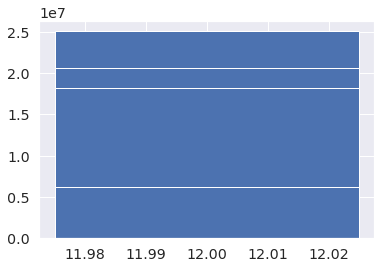

In [165]:
# 전체 소비 횟수의 비교
# bar그래프...
x = len(up_jong_year)


plt.bar(x, upjong_2020_1, width = 0.05)

upjong_2020_1
upjong_2020_2
upjong_2021_1
upjong_2021_2

In [ ]:
# 업종 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
## 데이터 준비
labels = ['Apple','Banana','Grape','Pear','Peach'] ## 라벨
frequency = [120,120,380,240,200] ## 빈도
 
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(frequency, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       wedgeprops=dict(width=0.5) ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
       )
 
total = np.sum(frequency) ## 빈도수 총합
 
sum_pct = 0 ## 백분율 초기값
for i,l in enumerate(labels):
    ang1, ang2 = pie[0][i].theta1, pie[0][i].theta2 ## 각1, 각2
    r = pie[0][i].r ## 원의 반지름
    
    x = ((r+0.5)/2)*np.cos(np.pi/180*((ang1+ang2)/2)) ## 정중앙 x좌표
    y = ((r+0.5)/2)*np.sin(np.pi/180*((ang1+ang2)/2)) ## 정중앙 y좌표
    
    if i < len(labels) - 1:
        sum_pct += float(f'{frequency[i]/total*100:.2f}') ## 백분율을 누적한다.
        ax.text(x,y,f'{frequency[i]/total*100:.2f}%',ha='center',va='center') ## 백분율 텍스트 표시
    else: ## 총합을 100으로 맞추기위해 마지막 백분율은 100에서 백분율 누적값을 빼준다.
        ax.text(x,y,f'{100-sum_pct:.2f}%',ha='center',va='center') 
 
plt.legend(pie[0],labels) ## 범례 표시
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

indexs = sobi_2020.columns
year_index = ["201912", "202001", "202002", "202003", "202004", "202005"]
for index in indexs:
    new = sobi_2020[[index]].values[:]
    new = list(new.reshape(-1))
    print(new)

[201912, 202001, 202002, 202003, 202004, 202005]
[8807, 5217, 4287, 4351, 3196, 4020]
[263493, 228466, 223281, 233729, 244032, 270353]
[1578762, 1169229, 1074358, 1293691, 1279089, 1384097]
[62237, 58776, 67417, 102701, 129325, 148363]
[239490, 276516, 133630, 154514, 135981, 140261]
[307405, 174223, 58594, 13101, 6534, 13781]
[71387, 23974, 21647, 20452, 21851, 24513]
[1003190, 971959, 528955, 331066, 430016, 596222]
[44042, 17008, 3191, 6161, 7503, 18466]
[6512150, 5233899, 4501033, 3825968, 4005497, 3491017]
[55730, 42030, 36427, 41490, 43507, 50651]
[8354748, 6791691, 6179050, 6841845, 6794444, 7329250]
[62194, 46430, 14998, 1899, 888, 2448]
[145211, 66639, 54329, 54146, 57480, 77230]
[1124882, 786658, 814319, 971389, 916514, 912013]
[813395, 538533, 369545, 315538, 420188, 535581]
[2002488, 1410844, 1158122, 1048013, 1108119, 1226908]
[867858, 842292, 817244, 865317, 846660, 870444]
[288071, 216930, 179202, 179392, 199945, 247504]
[1293, 539, 439, 427, 565, 524]
[202619, 131940, 1

In [15]:
# 고객거주시 별 고객수
고객수 = data[["고객거주시", '고객수']].groupby(['고객거주시']).sum().sort_values(by='고객수', ascending = False).T
고객수

고객거주시,경기,서울,부산,경남,인천,대구,경북,충남,대전,광주,전북,충북,전남,강원,울산,제주,세종
고객수,18915249,13978034,4759243,4059354,3780634,3733151,2923044,2718847,2375079,1881099,1874852,1779361,1533392,1529292,1520971,704755,452031


FileNotFoundError: [Errno 2] No such file or directory: '../dataset/korea.png'

In [6]:
import pandas as pd

data = pd.read_csv('../data/DATA_SSC_ONEPER_F.csv',encoding='euc-kr')
df = pd.DataFrame(data)
변수 = list(df.columns)

In [9]:
변수모음 = []

for i in 변수:
    i = i.replace("CNT_", '')
    변수모음.append(i)

In [13]:
print('소비년월',
 '고객거주지역',
 '연령성별',
 '직업',
 '추정소득',
 '일인가구여부',
 '고객수',
 'CNT',
 'DAY_월',
 'DAY_화',
 'DAY_수',
 'DAY_목',
 'DAY_금',
 'DAY_토',
 'DAY_일',
 'DAY_평일',
 'DAY_주말공휴일',
 'TIME_A',
 'TIME_B',
 'TIME_C',
 'TIME_D',
 'TIME_E',
 'TIME_F',
 'TIME_G',
 'TIME_H',
 'TIME_I',
 'TIME_J',
 '가례',
 '가전',
 '건강보조',
 '골프장',
 '공과금',
 '관람',
 '교육기타',
 '교통',
 '놀이공원',
 '대중교통',
 '동물병원',
 '마트할인점',
 '면세점',
 '문구사무용품',
 '배달앱',
 '백화점',
 '병원',
 '보험',
 '뷰티',
 '상품권',
 '서적',
 '쇼핑기타',
 '숙박',
 '스포츠시설',
 '스포츠의류용품',
 '아울렛',
 '여행상품',
 '온라인쇼핑',
 '유아교육',
 '유흥',
 '음식점',
 '의류',
 '인테리어',
 '정기결제',
 '제과점',
 '주류판매점',
 '주생활관리',
 '주유',
 '주차',
 '차량관리',
 '차량구매',
 '취미',
 '커피음료',
 '패션잡화',
 '편의점',
 '학교',
 '학원',
 '화장품')

소비년월 고객거주지역 연령성별 직업 추정소득 일인가구여부 고객수 CNT DAY_월 DAY_화 DAY_수 DAY_목 DAY_금 DAY_토 DAY_일 DAY_평일 DAY_주말공휴일 TIME_A TIME_B TIME_C TIME_D TIME_E TIME_F TIME_G TIME_H TIME_I TIME_J 가례 가전 건강보조 골프장 공과금 관람 교육기타 교통 놀이공원 대중교통 동물병원 마트할인점 면세점 문구사무용품 배달앱 백화점 병원 보험 뷰티 상품권 서적 쇼핑기타 숙박 스포츠시설 스포츠의류용품 아울렛 여행상품 온라인쇼핑 유아교육 유흥 음식점 의류 인테리어 정기결제 제과점 주류판매점 주생활관리 주유 주차 차량관리 차량구매 취미 커피음료 패션잡화 편의점 학교 학원 화장품


In [12]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image

구름 = np.array(Image.open('../data/구름.png'))

wc = WordCloud(font_path='../dataset/HS유지체.ttf',
               mask = 구름,
               background_color = "white")

wc.generate(변수모음)
wc.to_file('./wordcloud_life.png')

TypeError: expected string or bytes-like object